In [4]:
from __future__ import absolute_import, division, print_function,unicode_literals
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,models, layers
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm# barra de progreso
import cv2
from glob import glob

#para redimensionar
import sklearn
import skimage
from skimage.transform import resize
from skimage.color import rgb2gray
import random
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


2022-09-05 13:29:38.794911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-05 13:29:38.794951: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
train_dir='chest_xray/train/'
test_dir='chest_xray/test/'

LOAD_IMAGES=True#luego del primer proceso hay q ponerlo en false
def get_data(folder):
    x=[]
    y=[]
    for folder_name in os.listdir(folder):
        if not folder_name.startswith('.'):
            if folder_name in ['NORMAL']:
                label=0
            elif folder_name in ['PNEUMONIA']:
                label=1
            else:
                label=2
            for img_name in tqdm(os.listdir(folder+folder_name)):
                img_file=cv2.imread(folder+folder_name+'/'+img_name)
                if img_file is not None:
                    img_file=skimage.transform.resize(img_file,(150,150,3),mode='constant',anti_aliasing=True)
                    img_file=rgb2gray(img_file)
                    img_arr=np.asarray(img_file)
                    x.append(img_arr)
                    y.append(label)
    x=np.asarray(x)
    y=np.asarray(y)
    return x,y

if LOAD_IMAGES:
    #cargamos las imagenes
    x_train,y_train=get_data(train_dir)
    x_test,y_test=get_data(test_dir)
    #grabamos los arrays en archivos
    np.save('x_train.npy',x_train)
    np.save('y_train.npy',y_train)
    np.save('x_test.npy',x_test)
    np.save('y_test.npy',y_test)
else:
    x_train=np.load('x_train.npy')
    y_train=np.load('y_train.npy')
    x_test=np.load('x_test.npy')
    y_test=np.load('y_test.npy')
            

100%|█████████████████████████████████████████| 390/390 [00:31<00:00, 12.50it/s]


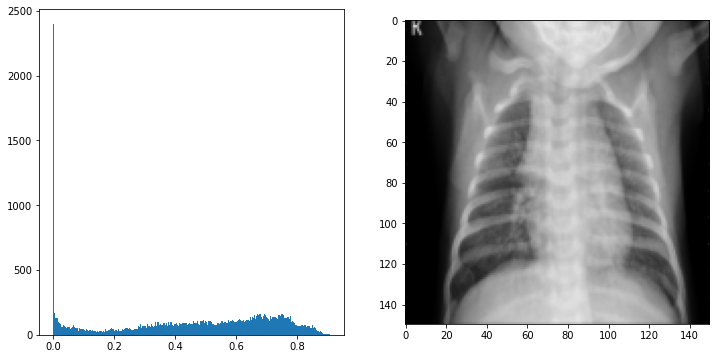

In [7]:
def plotHistogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.hist(a.ravel(), bins=255)
    plt.subplot(1, 2, 2)
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.show()
    
plotHistogram(x_train[3])